<a href="https://colab.research.google.com/github/dylanahola/Chess_Learning_Algorithm/blob/main/ChessProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Week 7/gamesdata.excel.csv')
df.head(10)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
5,MsoDV9wj,False,1.504240e+12,1.504240e+12,5,draw,draw,10+0,trelynn17,1250,franklin14532,1002,e4 c5 Nf3 Qa5 a3,B27,Sicilian Defense: Mongoose Variation,4
6,qwU9rasv,True,1.504230e+12,1.504230e+12,33,resign,white,10+0,capa_jr,1520,daniel_likes_chess,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,10
7,RVN0N3VK,False,1.503680e+12,1.503680e+12,9,resign,black,15+30,daniel_likes_chess,1413,soultego,2108,e4 Nc6 d4 e5 d5 Nce7 c3 Ng6 b4,B00,Nimzowitsch Defense: Kennedy Variation | Link...,5
8,dwF3DJHO,True,1.503510e+12,1.503510e+12,66,resign,black,15+0,ehabfanri,1439,daniel_likes_chess,1392,e4 e5 Bc4 Nc6 Nf3 Nd4 d3 Nxf3+ Qxf3 Nf6 h3 Bc5...,C50,Italian Game: Schilling-Kostic Gambit,6
9,afoMwnLg,True,1.503440e+12,1.503440e+12,119,mate,white,10+0,daniel_likes_chess,1381,mirco25,1209,e4 d5 exd5 Qxd5 Nc3 Qe5+ Be2 Na6 d4 Qf5 Bxa6 b...,B01,Scandinavian Defense: Mieses-Kotroc Variation,4


In [ ]:
#I am a huge chess nerd and I found this cool data set and would like to try and make a model to predict the winner of games based on the data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [ ]:
df.duplicated().any()

True

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.dropna(inplace = True)

In [ ]:
#I understand this feature in a chess sense but will need to consult my instructor on what the best option is on handling it. I'll schedule a 1-on-1 for next week.
df['increment_code']

0         15+2
1         5+10
2         5+10
3         20+0
4         30+3
         ...  
20053    10+10
20054     10+0
20055     10+0
20056     10+0
20057     10+0
Name: increment_code, Length: 19629, dtype: object

In [ ]:
#While cleaning the data I also decided to drop the columns that list the game or player's ID since all of the data entries in each are unique I can't see it being useful in making predictions.
df.drop(columns = ['id','white_id','black_id', 'rated'], inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19629 entries, 0 to 20057
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   created_at      19629 non-null  float64
 1   last_move_at    19629 non-null  float64
 2   turns           19629 non-null  int64  
 3   victory_status  19629 non-null  object 
 4   winner          19629 non-null  object 
 5   increment_code  19629 non-null  object 
 6   white_rating    19629 non-null  int64  
 7   black_rating    19629 non-null  int64  
 8   moves           19629 non-null  object 
 9   opening_eco     19629 non-null  object 
 10  opening_name    19629 non-null  object 
 11  opening_ply     19629 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 1.9+ MB


In [ ]:
test_df = df[df['opening_name'] == 'Sicilian Defense']

In [ ]:
test_df.head()

,created_at,last_move_at,turns,victory_status,winner,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply
32,1.502780e+12,1.502780e+12,54,resign,white,10+10,1203,1019,e4 c5 Nf3 d5 exd5 Qxd5 Nc3 Qe6+ Qe2 Qxe2+ Bxe2...,B27,Sicilian Defense,3
167,1.503450e+12,1.503450e+12,107,resign,white,10+10,1885,1856,e4 c5 Nf3 d6 Nc3 a6 a3 Nf6 Bc4 e6 d3 Nc6 Ba2 B...,B50,Sicilian Defense,4
174,1.503120e+12,1.503120e+12,105,outoftime,white,10+0,1895,1859,e4 c5 Nf3 d6 Bc4 Nf6 d3 a6 a3 g6 b4 Bg7 Bb2 O-...,B50,Sicilian Defense,4
176,1.503090e+12,1.503090e+12,144,outoftime,draw,10+0,1866,1843,e4 c5 Nf3 d6 g3 Nf6 d3 Nc6 Bg2 g6 O-O Bg7 Nc3 ...,B50,Sicilian Defense,4
191,1.501040e+12,1.501040e+12,136,resign,black,15+0,1800,1826,e4 c5 Qf3 Nc6 c3 d6 Bc4 Nf6 Bb5 Bg4 Bxc6+ bxc6...,B20,Sicilian Defense,2


In [ ]:
df['opening_eco'].value_counts()

A00    992
C00    824
D00    719
B01    707
C41    671
      ... 
C83      1
D48      1
D58      1
E52      1
D19      1
Name: opening_eco, Length: 365, dtype: int64

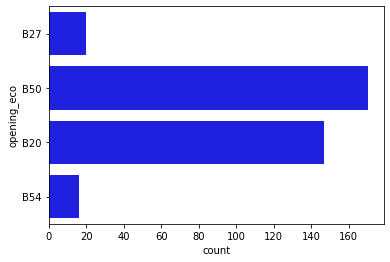

In [ ]:
ax  =sns.countplot(y = 'opening_eco', data = test_df, palette=['blue'])


In [ ]:
b27_df = df[df['opening_eco'] == 'B27']

In [ ]:
b27_df.head()

,created_at,last_move_at,turns,victory_status,winner,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply
5,1.504240e+12,1.504240e+12,5,draw,draw,10+0,1250,1002,e4 c5 Nf3 Qa5 a3,B27,Sicilian Defense: Mongoose Variation,4
32,1.502780e+12,1.502780e+12,54,resign,white,10+10,1203,1019,e4 c5 Nf3 d5 exd5 Qxd5 Nc3 Qe6+ Qe2 Qxe2+ Bxe2...,B27,Sicilian Defense,3
158,1.503690e+12,1.503690e+12,125,resign,white,15+0,1851,1918,e4 c5 Nf3 g6 Nc3 Bg7 Bb5 a6 Be2 Nc6 O-O b5 a3 ...,B27,Sicilian Defense: Hyperaccelerated Dragon,4
219,1.503510e+12,1.503510e+12,44,mate,black,15+1,1274,1534,e4 e5 Nf3 c5 d4 Nc6 dxe5 d6 exd6 Bxd6 Bg5 Nf6 ...,B27,Sicilian Defense: Jalalabad Variation,4
292,1.502500e+12,1.502500e+12,72,resign,white,15+15,1611,1478,Nf3 c5 e4 Qc7 Nc3 a6 d4 e6 d5 e5 a4 d6 Nd2 Nf6...,B27,Sicilian Defense: Quinteros Variation,4


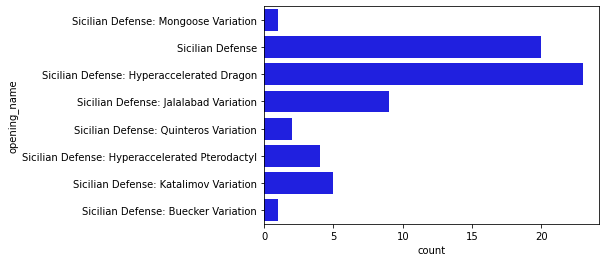

In [ ]:
ax  =sns.countplot(y = 'opening_name', data = b27_df, palette=['blue'])

In [ ]:
b50_df = df[df['opening_eco'] == 'B50']

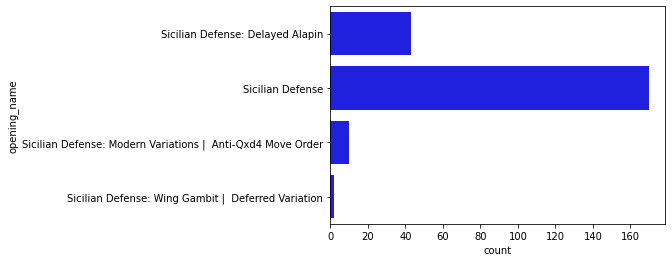

In [ ]:
ax  =sns.countplot(y = 'opening_name', data = b50_df, palette=['blue'])

In [ ]:
#From the data exploration above I found that although both the opening_eco and opening_name column provide a great deal of information, I'll need to find a cleaner way to represent that data.

In [ ]:
#Citations Dumping:
#https://stackoverflow.com/questions/35552874/get-first-letter-of-a-string-from-column
#https://www.geeksforgeeks.org/get-the-substring-of-the-column-in-pandas-python/
#https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/
#https://www.edureka.co/blog/python-list-length/


In [ ]:
df['Letter'] = df['opening_eco'].str[0]
df['Letter']

0        D
1        B
2        C
3        D
4        C
        ..
20053    A
20054    A
20055    D
20056    B
20057    D
Name: Letter, Length: 19629, dtype: object

In [ ]:
df['Number'] = df['opening_eco'].str.slice(1,3)
df['Number']

0        10
1        00
2        20
3        02
4        41
         ..
20053    80
20054    41
20055    00
20056    07
20057    00
Name: Number, Length: 19629, dtype: object

In [ ]:
df['Number'] = df['Number'].astype(int)

In [ ]:
df['Number']

0        10
1         0
2        20
3         2
4        41
         ..
20053    80
20054    41
20055     0
20056     7
20057     0
Name: Number, Length: 19629, dtype: int64

In [ ]:
#E60-E99 King's Indian defence

In [ ]:
conditions = [
              (df['Letter'] == 'E') & (df['Number'] >= 60) & (df['Number'] <= 99),
              (df['Letter'] == 'E') & (df['Number'] >= 20) & (df['Number'] <= 59),
              (df['Letter'] == 'E') & (df['Number'] >= 12) & (df['Number'] <= 19),
              (df['Letter'] == 'E') & (df['Number'] == 11),
              (df['Letter'] == 'E') & (df['Number'] == 10),
              (df['Letter'] == 'E') & (df['Number'] >= 1) & (df['Number'] <= 9),
              (df['Letter'] == 'E') & (df['Number'] == 0),
              (df['Letter'] == 'D') & (df['Number'] >= 80) & (df['Number'] <= 99),
              (df['Letter'] == 'D') & (df['Number'] >= 70) & (df['Number'] <= 79),
              (df['Letter'] == 'D') & (df['Number'] >= 50) & (df['Number'] <= 69),
              (df['Letter'] == 'D') & (df['Number'] >= 43) & (df['Number'] <= 49),
              (df['Letter'] == 'D') & (df['Number'] >= 30) & (df['Number'] <= 42),
              (df['Letter'] == 'D') & (df['Number'] >= 20) & (df['Number'] <= 29),
              (df['Letter'] == 'D') & (df['Number'] >= 17) & (df['Number'] <= 19),
              (df['Letter'] == 'D') & (df['Number'] == 16),
              (df['Letter'] == 'D') & (df['Number'] >= 10) & (df['Number'] <= 15),
              (df['Letter'] == 'D') & (df['Number'] >= 7) & (df['Number'] <= 9),
              (df['Letter'] == 'D') & (df['Number'] == 6),
              (df['Letter'] == 'D') & (df['Number'] >= 4) & (df['Number'] <= 5),
              (df['Letter'] == 'D') & (df['Number'] == 3),
              (df['Letter'] == 'D') & (df['Number'] == 2),
              (df['Letter'] == 'D') & (df['Number'] == 1),
              (df['Letter'] == 'D') & (df['Number'] == 0),
              (df['Letter'] == 'C') & (df['Number'] >= 60) & (df['Number'] <= 99),
              (df['Letter'] == 'C') & (df['Number'] >= 55) & (df['Number'] <= 59),
              (df['Letter'] == 'C') & (df['Number'] >= 53) & (df['Number'] <= 54),
              (df['Letter'] == 'C') & (df['Number'] >= 51) & (df['Number'] <= 52),
              (df['Letter'] == 'C') & (df['Number'] == 50),
              (df['Letter'] == 'C') & (df['Number'] >= 47) & (df['Number'] <= 49),
              (df['Letter'] == 'C') & (df['Number'] == 46),
              (df['Letter'] == 'C') & (df['Number'] == 45),
              (df['Letter'] == 'C') & (df['Number'] == 44),
              (df['Letter'] == 'C') & (df['Number'] >= 42) & (df['Number'] <= 43),
              (df['Letter'] == 'C') & (df['Number'] == 41),
              (df['Letter'] == 'C') & (df['Number'] == 40),
              (df['Letter'] == 'C') & (df['Number'] >= 30) & (df['Number'] <= 39),
              (df['Letter'] == 'C') & (df['Number'] >= 25) & (df['Number'] <= 29),
              (df['Letter'] == 'C') & (df['Number'] >= 23) & (df['Number'] <= 24),
              (df['Letter'] == 'C') & (df['Number'] >= 21) & (df['Number'] <= 22),
              (df['Letter'] == 'C') & (df['Number'] == 20),
              (df['Letter'] == 'C') & (df['Number'] >= 00) & (df['Number'] <= 19),
              (df['Letter'] == 'B') & (df['Number'] >= 20) & (df['Number'] <= 99),
              (df['Letter'] == 'B') & (df['Number'] >= 10) & (df['Number'] <= 19),
              (df['Letter'] == 'B') & (df['Number'] >= 7) & (df['Number'] <= 9),
              (df['Letter'] == 'B') & (df['Number'] == 6),
              (df['Letter'] == 'B') & (df['Number'] >= 2) & (df['Number'] <= 5),
              (df['Letter'] == 'B') & (df['Number'] == 1),
              (df['Letter'] == 'B') & (df['Number'] == 0),
              (df['Letter'] == 'A') & (df['Number'] >= 80) & (df['Number'] <= 99),
              (df['Letter'] == 'A') & (df['Number'] >= 60) & (df['Number'] <= 79),
              (df['Letter'] == 'A') & (df['Number'] >= 57) & (df['Number'] <= 59),
              (df['Letter'] == 'A') & (df['Number'] == 56),
              (df['Letter'] == 'A') & (df['Number'] >= 53) & (df['Number'] <= 55),
              (df['Letter'] == 'A') & (df['Number'] >= 51) & (df['Number'] <= 52),
              (df['Letter'] == 'A') & (df['Number'] == 50),
              (df['Letter'] == 'A') & (df['Number'] >= 48) & (df['Number'] <= 49),
              (df['Letter'] == 'A') & (df['Number'] == 47),
              (df['Letter'] == 'A') & (df['Number'] >= 45) & (df['Number'] <= 46),
              (df['Letter'] == 'A') & (df['Number'] >= 43) & (df['Number'] <= 44),
              (df['Letter'] == 'A') & (df['Number'] == 42),
              (df['Letter'] == 'A') & (df['Number'] >= 40) & (df['Number'] <= 41),
              (df['Letter'] == 'A') & (df['Number'] >= 10) & (df['Number'] <= 39),
              (df['Letter'] == 'A') & (df['Number'] >= 4) & (df['Number'] <= 9),
              (df['Letter'] == 'A') & (df['Number'] >= 2) & (df['Number'] <= 3),
              (df['Letter'] == 'A') & (df['Number'] == 1),
              (df['Letter'] == 'A') & (df['Number'] == 0),
              

]

In [ ]:
values = ['E60-E99 Kings Indian defence', 'E20-E59 Nimzo-Indian defence', ' E12-E19 Queens Indian defence',' E11 Bogo-Indian defence', 'E10 Queens pawn game',
          'E01-E09 Catalan, closed', 'E00 Queens pawn game', 'D80-D99 Gruenfeld defence', 'D70-D79 Neo-Gruenfeld defence', 'D50-D69 Queens Gambit Declined, 4.Bg5',
          'D43-D49 Queens Gambit Declined semi-Slav', 'D30-D42 Queens gambit declined', 'D20-D29 Queens gambit accepted', 'D17-D19 Queens Gambit Declined Slav, Czech defence',
          'D16 Queens Gambit Declined Slav accepted, Alapin variation', 'D10-D15 Queens Gambit Declined Slav defence', 'D07-D09 Queens Gambit Declined, Chigorin defence',
          'D06 Queens Gambit', 'D04-D05 Queens pawn game', 'D03 Torre attack (Tartakower variation)', 'D02 Queens pawn game', 'D01 Richter-Veresov attack', 'D00 Queens pawn game',
          'C60-C99 Ruy Lopez (Spanish opening)', 'C55-C59 Two knights defence', 'C53-C54 Giuoco Piano', 'C51-C52 Evans gambit', 'C50 Kings pawn game', 'C47-C49 Four knights, Scotch variation',
          'C46 Three knights game', 'C45 Scotch game', 'C44 Kings pawn game', 'C42-C43 Petrovs defence', 'C41 Philidors defence', 'C40 Kings knight opening', 'C30-C39 Kings gambit', 'C25-C29 Vienna game',
          'C23-C24 Bishops opening', 'C21-C22 Centre game', 'C20 Kings pawn game', 'C00-C19 French defence', 'B20-B99 Sicilian defence', 'B10-B19 Caro-Kann defence', 'B07-B09 Pirc defence', 'B06 Robatsch (modern) defence',
          'B02-B05 Alekhines defence', 'B01 Scandinavian (centre counter) defence', 'B00 Kings pawn opening', 'A80-A99 Dutch', 'A60-A79 Benoni defence', 'A57-A59 Benko gambit', 'A56 Benoni defence', 'A53-A55 Old Indian defence',
          'A51-A52 Budapest defence', 'A50 Queens pawn game', 'A48-A49 Kings Indian, East Indian defence', 'A47 Queens Indian defence', 'A45-A46 Queens pawn game', 'A43-A44 Old Benoni defence', 'A42 Modern defence, Averbakh system',
          'A40-A41 Queens pawn', 'A10-A39 English opening', 'A04-A09 Reti opening', 'A02-A03 Birds opening', 'A01 Nimzovich-Larsen attack', 'A00 Polish (Sokolsky) opening'
]

In [ ]:
df['ComboName'] = np.select(conditions, values)
df[df['Letter']== 'E']

,created_at,last_move_at,turns,victory_status,winner,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply,Letter,Number,ComboName
63,1.503970e+12,1.503970e+12,25,resign,white,8+12,1939,1581,d4 Nf6 c4 e6 Nf3 c5 d5 exd5 cxd5 c4 Nc3 Bb4 Bg...,E10,Blumenfeld Countergambit #2,6,E,10,E10 Queens pawn game
139,1.503130e+12,1.503130e+12,58,mate,black,15+15,1335,1233,d4 Nf6 c4 e6 Nc3 Bb4 Bd2 O-O e3 d5 cxd5 exd5 Q...,E20,Nimzo-Indian Defense,6,E,20,E20-E59 Nimzo-Indian defence
145,1.503090e+12,1.503090e+12,43,mate,white,10+0,1550,1225,d4 Nf6 c4 e6 Nf3 Bb4+ Bd2 Bxd2+ Nbxd2 O-O e4 d...,E11,Bogo-Indian Defense: Exchange Variation,8,E,11,E11 Bogo-Indian defence
165,1.503460e+12,1.503460e+12,69,outoftime,white,8+0,1855,1858,Nh3 d5 g3 Nf6 Bg2 c5 f4 e6 Nf2 Nc6 d3 d4 e4 e5...,E00,Amar Opening,1,E,0,E00 Queens pawn game
180,1.501980e+12,1.501980e+12,158,mate,black,6+6,1835,1865,d4 Nf6 Nf3 e6 c4 c5 e3 cxd4 exd4 d5 c5 Be7 Bb5...,E10,Blumenfeld Countergambit #2,6,E,10,E10 Queens pawn game
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19977,1.496948e+12,1.496954e+12,91,resign,white,30+30,2100,1840,e4 g6 d4 Bg7 c4 d6 Nc3 Nf6 Nf3 O-O Be2 c5 d5 B...,E91,King's Indian Defense: Orthodox Variation,11,E,91,E60-E99 Kings Indian defence
19982,1.502366e+12,1.502371e+12,77,resign,white,30+30,2048,1801,d4 Nf6 Nf3 e6 c4 b6 g3 Bb7 Bg2 Be7 O-O O-O Nc3...,E17,Queen's Indian Defense: Classical Variation | ...,13,E,17,E12-E19 Queens Indian defence
19998,1.498509e+12,1.498509e+12,87,outoftime,white,5+5,1998,1920,d4 Nf6 Nf3 d5 c4 e6 Nc3 Bb4 Bg5 h6 Bxf6 Qxf6 e...,E20,Nimzo-Indian Defense: Ragozin Variation,8,E,20,E20-E59 Nimzo-Indian defence
20021,1.504283e+12,1.504284e+12,56,resign,black,10+0,1876,1913,c4 Nf6 d4 g6 Nc3 Bg7 Nf3 O-O g3 d6 Bg2 Nbd7 b4...,E67,King's Indian Defense: Fianchetto Variation | ...,12,E,67,E60-E99 Kings Indian defence


In [ ]:
values

['E60-E99 Kings Indian defence',
 'E20-E59 Nimzo-Indian defence',
 ' E12-E19 Queens Indian defence',
 ' E11 Bogo-Indian defence',
 'E10 Queens pawn game',
 'E01-E09 Catalan, closed',
 'E00 Queens pawn game',
 'D80-D99 Gruenfeld defence',
 'D70-D79 Neo-Gruenfeld defence',
 'D50-D69 Queens Gambit Declined, 4.Bg5',
 'D43-D49 Queens Gambit Declined semi-Slav',
 'D30-D42 Queens gambit declined',
 'D20-D29 Queens gambit accepted',
 'D17-D19 Queens Gambit Declined Slav, Czech defence',
 'D16 Queens Gambit Declined Slav accepted, Alapin variation',
 'D10-D15 Queens Gambit Declined Slav defence',
 'D07-D09 Queens Gambit Declined, Chigorin defence',
 'D06 Queens Gambit',
 'D04-D05 Queens pawn game',
 'D03 Torre attack (Tartakower variation)',
 'D02 Queens pawn game',
 'D01 Richter-Veresov attack',
 'D00 Queens pawn game',
 'C60-C99 Ruy Lopez (Spanish opening)',
 'C55-C59 Two knights defence',
 'C53-C54 Giuoco Piano',
 'C51-C52 Evans gambit',
 'C50 Kings pawn game',
 'C47-C49 Four knights, Scotch

In [ ]:
len(conditions)

66

In [ ]:
df['winner'].value_counts()

white    9792
black    8919
draw      918
Name: winner, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19629 entries, 0 to 20057
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   created_at      19629 non-null  float64
 1   last_move_at    19629 non-null  float64
 2   turns           19629 non-null  int64  
 3   victory_status  19629 non-null  object 
 4   winner          19629 non-null  object 
 5   increment_code  19629 non-null  object 
 6   white_rating    19629 non-null  int64  
 7   black_rating    19629 non-null  int64  
 8   moves           19629 non-null  object 
 9   opening_eco     19629 non-null  object 
 10  opening_name    19629 non-null  object 
 11  opening_ply     19629 non-null  int64  
 12  Letter          19629 non-null  object 
 13  Number          19629 non-null  int64  
 14  ComboName       19629 non-null  object 
dtypes: float64(2), int64(5), object(8)
memory usage: 2.4+ MB


In [ ]:
df.drop(columns= ['opening_eco', 'opening_name', 'Letter', 'Number'], inplace = True)

In [ ]:
df['ComboName']

0        D10-D15 Queens Gambit Declined Slav defence
1                             B00 Kings pawn opening
2                                C20 Kings pawn game
3                               D02 Queens pawn game
4                              C41 Philidors defence
                            ...                     
20053                                  A80-A99 Dutch
20054                            A40-A41 Queens pawn
20055                           D00 Queens pawn game
20056                           B07-B09 Pirc defence
20057                           D00 Queens pawn game
Name: ComboName, Length: 19629, dtype: object

In [ ]:
# I successfully took the information from the opening_eco column and the opening_name columns and combined them into one column. Next I'll have to handle the categorical variables using dummy columns. This will produce a lot of features.
#My plan is to use dummy columns to hanlde the categorical values then use PCA for data reduction, minimizing the problem of the increase in features.


In [ ]:
df_dummies = pd.get_dummies(df, columns = ['ComboName', 'victory_status', 'increment_code', 'moves'], drop_first= True)
df_dummies.head(1)

,created_at,last_move_at,turns,winner,white_rating,black_rating,opening_ply,ComboName_ E12-E19 Queens Indian defence,ComboName_A00 Polish (Sokolsky) opening,ComboName_A01 Nimzovich-Larsen attack,ComboName_A02-A03 Birds opening,ComboName_A04-A09 Reti opening,ComboName_A10-A39 English opening,ComboName_A40-A41 Queens pawn,"ComboName_A42 Modern defence, Averbakh system",ComboName_A43-A44 Old Benoni defence,ComboName_A45-A46 Queens pawn game,ComboName_A47 Queens Indian defence,"ComboName_A48-A49 Kings Indian, East Indian defence",ComboName_A50 Queens pawn game,ComboName_A51-A52 Budapest defence,ComboName_A53-A55 Old Indian defence,ComboName_A56 Benoni defence,ComboName_A57-A59 Benko gambit,ComboName_A60-A79 Benoni defence,ComboName_A80-A99 Dutch,ComboName_B00 Kings pawn opening,ComboName_B01 Scandinavian (centre counter) defence,ComboName_B02-B05 Alekhines defence,ComboName_B06 Robatsch (modern) defence,ComboName_B07-B09 Pirc defence,ComboName_B10-B19 Caro-Kann defence,ComboName_B20-B99 Sicilian defence,ComboName_C00-C19 French defence,ComboName_C20 Kings pawn game,ComboName_C21-C22 Centre game,ComboName_C23-C24 Bishops opening,ComboName_C25-C29 Vienna game,ComboName_C30-C39 Kings gambit,ComboName_C40 Kings knight opening,...,moves_h3 d5 g3 Bf5 Nf3 e6 Bg2 c5 O-O Be7 c4 Nf6 cxd5 exd5 d4 c4 Nc3 O-O g4 Be6 Ne5 Nc6 f4 Rc8 f5 Bd7 g5 Ne4 Nxd5 Nxe5 Bxe4 Nc6 f6 Bd6 fxg7 Kxg7 Nf6 Bxh3 Rf3 Be6 Kg2 Ne7 Qh1,moves_h3 e5 Nc3 d5 Nf3 Nc6 Rh2 Bc5 Nh4 Nf6 Rb1 d4 Na4 b6 a3 Ba6 Ra1 Qd5 Nf3 O-O b3 e4 g3 exf3 exf3 Rae8+ Be2 Bxe2 Qxe2 Rxe2+ Kd1 Qe5 Ra2 Re1#,moves_h3 e5 a3 Nf6 e3 d5 Nc3 a6 d4 exd4 Qxd4 Nc6 Qd1 Bc5 Nf3 Bf5 Nh4 Be4 f3 Nh5 fxe4 Qxh4+ Kd2 Qf2+ Qe2 Bxe3+ Kd1 Qxe2+ Bxe2 Bxc1 Rxc1 Ng3 Rg1 Nxe2 Kxe2 dxe4 Nxe4 O-O g4 Rfe8 Kf3 Nd4+ Ke3 Rad8 Rgd1 Nxc2+ Kf4 Rxd1 Rxd1 Na1 Rxa1,moves_h3 e5 a3 d5 Nc3 d4 Ne4 Bf5 Ng3 Bg6 h4 h5 e3 c5 Nf3 Bd6 exd4 cxd4 Bb5+ Nd7 Qe2 a6 Nxe5 axb5 Nxg6+,moves_h3 e5 a3 d5 d3 Nf6 Nc3 Nc6 Bg5 Be7 Qd2 h6 Bh4 O-O O-O-O a6 g4 b5 f4 exf4 Bg2 Be6 e4 fxe3 Qe2 d4 Bxf6 Bxf6 Nf3 Bd5 h4 Bxf3 Qxf3 Ne5 Qg3 c5 g5 hxg5 hxg5 Bxg5 Nd5 e2+ Qxg5 Qxg5+ Kb1 exd1=Q+ Rxd1 Qxg2 Nf4 Qg5 Rf1 Qf5 Rf2 g5 Rh2 Qxf4 Rh1 Qf3 Re1 Rfe8 Ka2 a5 b3 c4 a4 cxb3+ Kxb3 bxa4+ Kxa4 Qc6+ Kb3 Rab8+ Ka3 Qxc2 Rxe5 Qb3#,moves_h3 e5 a3 d5 d3 d4 Nf3 Nc6 e4 f5 exf5 Bxf5 Be2 Nf6 O-O Bd6 c3 dxc3 Nxc3 h6 Nh4 Be6 Bf3 g5 Bh5+ Bf7 Nf3 Bxh5 g4 Bg6 Re1 Qe7 Nb5 a6 Nc3 O-O-O h4 Nxg4 Ne4 gxh4 Nxd6+ Qxd6 Nxe5 Ncxe5 Bf4 Rhe8 Qa4,moves_h3 e5 a3 d5 d4 Bd6 Nf3 e4 Ng5 Nf6 h4 h6 Nh3 Bg4 f3 Bxh3 gxh3 Nc6 Bg2 Qe7 O-O O-O-O fxe4 Nxe4 Bxe4 Qxe4 Bf4 Bxf4 Nc3 Qe3+ Kg2 Qg3+ Kh1 Qh2#,moves_h3 e5 e4 Nf6 d3 d5 Nc3 d4 Nce2 c5 f4 Nc6 Nf3 Bd6 g3 Nh5 Bg2 exf4 g4 Ng3 Nxg3 fxg3 O-O O-O Qe1 Re8 Bg5 Qb6 b3 Bd7 Bh4 Qc7 Nd2 Qb8 Nc4 Bc7 Rf3 b5 Nd2 Ne5 Rf1 Ng6 e5 Bxe5 Bxa8 Bf4 Ne4 Nxh4 Bd5 Be3+,moves_h3 e5 e4 d5 exd5 Qxd5 d3 Nc6 Nc3 Qd8 Nf3 Bf5 Be2 Bb4 Qd2 Nf6 a3 Bc5 O-O O-O Na4 Bd6 Nh4 Qd7 Nxf5 Qxf5 Qg5 Qe6 Be3 h6 Qh4 Be7 Nc5 Qc8 Qg3 b6 Bxh6 g6 Bxf8 Kxf8 Ne4 Nxe4 dxe4 Nd4 Bd3 Qd8 Qxe5 Bc5 Qh8+ Ke7 Qxd8+ Rxd8 Rad1 Ne6 b4 Bd6 Rd2 Bf4 Rdd1 Rg8 g3 Be5 Bc4 Nd4 Rd2 Nf3+ Kg2 Nxd2 Bd3 Nxf1 Kxf1 Rd8 Ke2 Ke6 Bc4+ Ke7 f4 Bd6 e5 Bxb4 axb4 Rd4 Bd3 Rxb4 c4 a5 Kd2 c6 Kc3 Rb5 cxb5 cxb5 Bxb5 Ke6 Kd4 f5 exf6 Kxf6 Ke4 Ke6 Kf3 Kd6 Kg4 Kc5 Be8 b5 f5 b4 fxg6 b3 g7 b2 Bg6 a4 g8=Q a3 Qa2 Kb4 h4 Ka4 h5 Kb4 h6 Kc3 Qxa3+ Kd2 Qxb2+,moves_h3 e5 f3 Qh4+ g3 Qxg3#,moves_h3 e5 f3 d5 a3 Nf6 h4 h6 Rh3 Bxh3 gxh3 Bd6 Bg2 O-O h5 Nxh5 f4 Nxf4 Bf3 Qh4+ Kf1 e4 Bh1 Nxh3 Nxh3 Qxh3+ Kf2 Bg3+ Kg1 Qh2+ Kf1 Qf2#,moves_h4 Nc6 g4 Nf6 Bg2 Nb4 Na3 Nxc2+ Nxc2 Nxg4 f3 Nf2 Kxf2 h5 Ke1 Rh6 Nd4 a5 Nb3 Raa6 Nxa5 Rxa5 a4 Rc5 b4 Rxc1 Qxc1 Re6 Qd1 Rb6,moves_h4 Nc6 g4 e5 e4 d5 Bg2 d4 d3 h5 g5 Bg4 Bf3 Qd7 Bd2 O-O-O a4 a5 Na3 Bxa3 bxa3 Nge7 Qb1 Ng6 Qb5 Bxf3 Nxf3 Rhg8 Rb1 b6 Qa6+ Kb8 Ke2 Rgf8 Rb5 Qe6 Rhb1 Rd6 Bxa5 Na7 Bxb6 Nf4+ Kd2 Nxb5 Ba7+ Ka8 Qxb5 Rb6 Bxb6 Qxb6 Nxe5 Qxb5 axb5 f6 Nc6 fxg5 hxg5 Ne6 Ke2 h4 Rh1 h3 a4 Nxg5 Nxd4 Rh8 Nf3 Ne6 Ke3 Kb7 d4 Ra8 Ra1 Rh8 Nh2 Re8 f4 g5 f5 Nf4 c4 Ng2+ Kf3 Nh4+ Ke3 Nxf5+ Kd3 Ng3 e5 c5 bxc6+ Kxc6 a5,moves_h4 Nf6 Rh3 d6 Rf3 c5 Rd3 e6 a4 Nc6 Raa

In [ ]:
X = df_dummies.loc[:, df_dummies.columns[(df_dummies.columns != 'winner')]]

In [ ]:
y = df_dummies.loc[:, 'winner'].values

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3)

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
pca = PCA(n_components = 300)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test) 

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print('Training accuracy:', rfc.score(X_train_pca, y_train))
print('Testing accuracy:', rfc.score(X_test_pca, y_test))

Training accuracy: 1.0
Testing accuracy: 0.5558272208638957


In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
print('Training accuracy:', knn.score(X_train_pca, y_train))
print('Testing accuracy:', knn.score(X_test_pca, y_test))

Training accuracy: 0.6783506555261192
Testing accuracy: 0.5138549307253464


In [ ]:
#As far as presenting some sort of a model, I was able to use the PCA followed by testing KNN and RandomForest Classifiers. I will most likely find more time for TA hours and 1-on-1 sessions for potential advice from here, but it's a start!
#I will also be uploading my progress to github